## Flow field


<img src="files/pics/flowfieldformula.png" width=150>



HBox(children=(Checkbox(value=False, description=u'Streamline'), Checkbox(value=False, description=u'Pathline starts at t=0'), Checkbox(value=False, description=u'Streakline at t=time')))

FloatSlider(value=2.0, description=u'-5<time<5', max=5.0, min=-5.0, step=0.25)

<IPython.core.display.Javascript object>


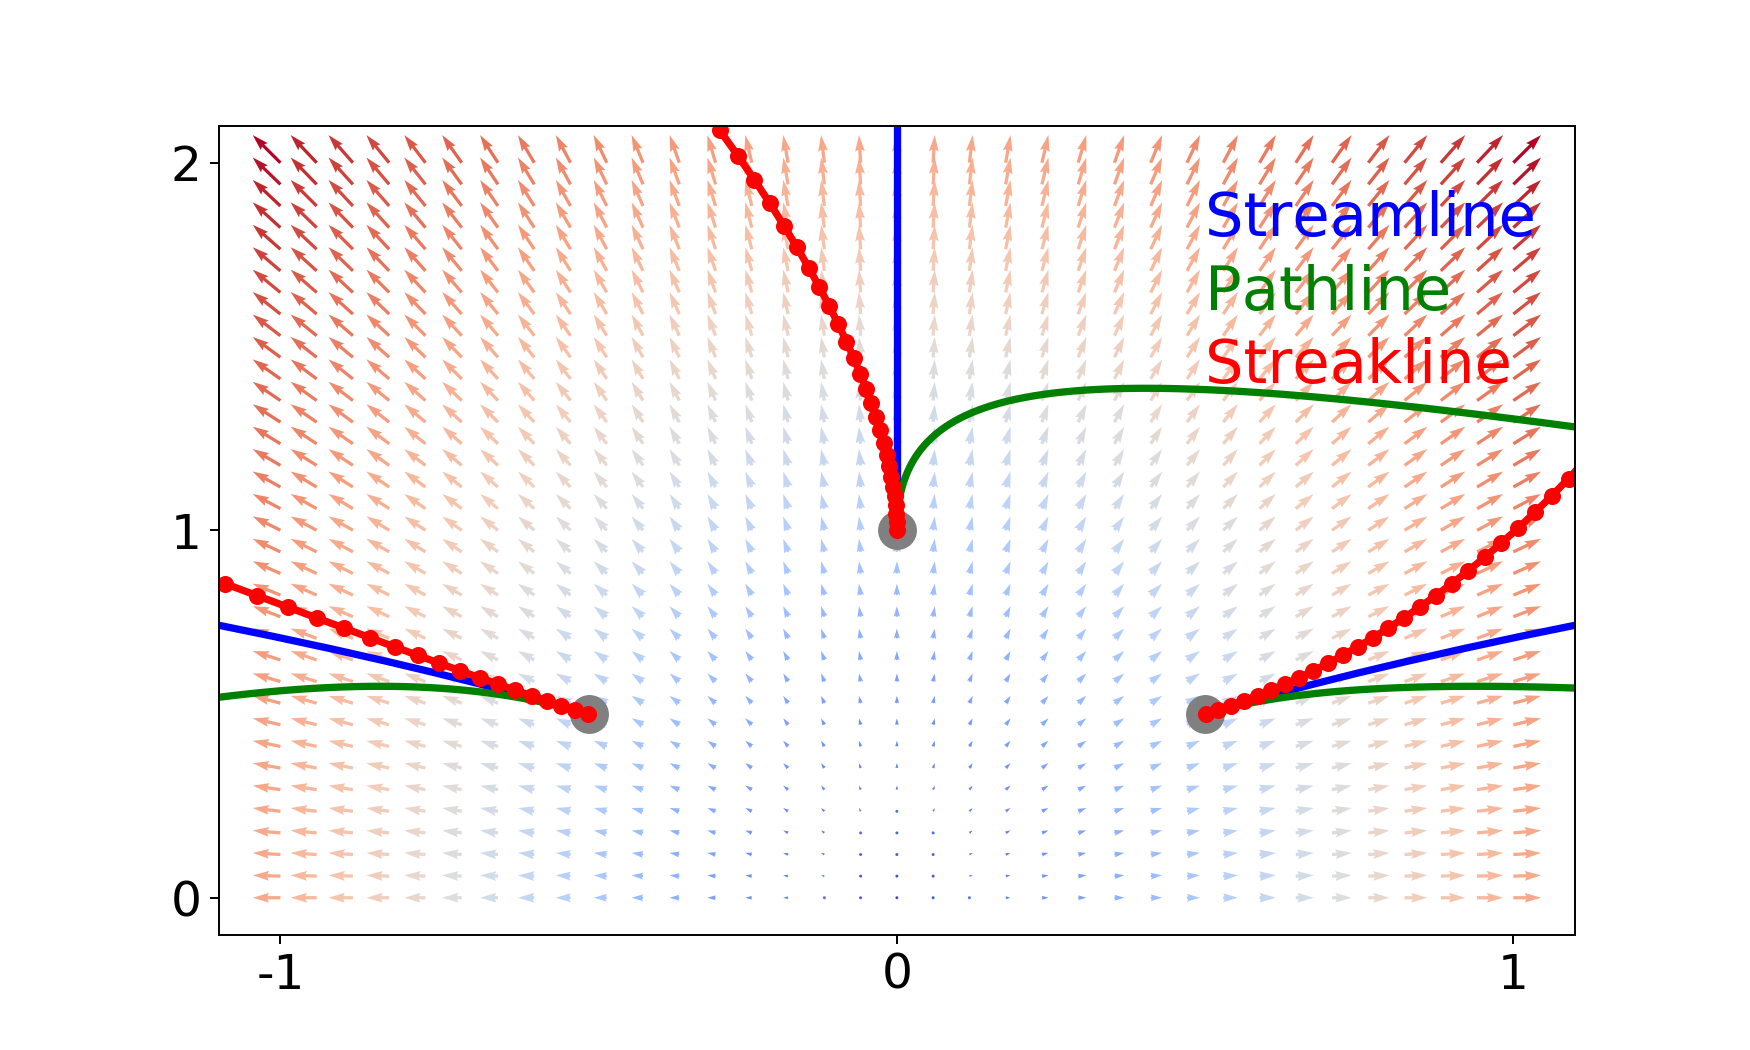

In [1]:
#standard boilerplate for Python
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pylab as plt
from ipywidgets import widgets
from IPython import display
from scipy.integrate import odeint

global tg

def myvelfield(y,tau):
    return [2.*y[0]+tg,y[1]-2.*tg]

def myvelfieldpath(y,tau):
    return [2.*y[0]+tau,y[1]-2.*tau]

def mystreamline(x0,y0):
    y=odeint(myvelfield,[x0, y0],np.linspace(0.,5.,100))
    return [y[:,0],y[:,1]]

def mypathline(x0,y0):
    y=odeint(myvelfieldpath,[x0, y0],np.linspace(0.,1.,100))
    return [y[:,0],y[:,1]]

def mystreakline(x0,y0,t):
    dt=0.001
    tcalc=np.linspace(t-2.,t-dt,100)
    xs=[]; ys=[]
    for tstart in tcalc:
        y=odeint(myvelfieldpath,[x0, y0],np.linspace(tstart,t,5))
        xs.append(y[-1,0])
        ys.append(y[-1,1])
    return [xs,ys]

def pltpath():
    for pos in seedpoints:
        [xs,ys]=mypathline(pos[0], pos[1])
        plt.plot(xs, ys,'g',linewidth=3)

def pltstreak(t):
    for pos in seedpoints:
        [xs,ys]=mystreakline(pos[0], pos[1],t)
        plt.plot(xs, ys,'or-',linewidth=3)
    
def pltstream(t):
    global tg
    tg=t
    for pos in seedpoints:
        [xs,ys]=mystreamline(pos[0], pos[1])
        plt.plot(xs, ys,'b',linewidth=3)
        

def plotlegends():
    plt.text(0.5,1.8,'Streamline',fontsize=25,color='b')
    plt.text(0.5,1.6,'Pathline',fontsize=25,color='g')
    plt.text(0.5,1.4,'Streakline',fontsize=25,color='r')
    
        
def plotall(newvalue):
    global tg
    tg=w_time.value
    t=w_time.value
    #plot velocity field with arrows
    plt.figure(1, figsize=(10, 6))
    plt.clf()
    tau=np.linspace(0.,1.0,100)
    U = 2.*xx+tg
    V = yy-2.*tg
    Q = plt.quiver(xx, yy, U, V, np.sqrt(U*U+V*V),cmap=cm.coolwarm)
    plt.axis('tight')
    
    for pos in seedpoints:
        plt.plot(pos[0], pos[1], 'o', markersize=15, color='#808080')
    #plot stream lines
    if (w_stream.value):
        pltstream(t)
    #plot path lines
    if (w_path.value):
        pltpath()
    #plot streak lines
    if (w_streak.value):
        pltstreak(t)
    plt.xticks((-1, 0, 1), ('-1', '0', '1'), color='k', size=20)
    plt.yticks((0, 1, 2), ('0', '1', '2'), color='k', size=20)
    plt.box
    plotlegends()
    #display.clear_output(wait=True)

xstart=0
ystart=-1 #start of grid in x and y-direction
xend=2
yend=1 #end of grid in x and y-direction 
steps=35 #number of gridpoints
h=(xend-xstart)/(steps-1.) #gridspacing
#generate two grids (note the return order yy,xx)
yy,xx=np.mgrid[xstart:xend:steps*1j,ystart:yend:steps*1j] 

seedpoints=[[0.5,0.5],[0.,1.],[-.5,0.5]]
    
    
    
w_time=widgets.FloatSlider(min=-5,max=5.,step=.25,\
                                       value=2,description='-5<time<5')
w_stream = widgets.Checkbox(description='Streamline',margin=10)
w_path = widgets.Checkbox(description='Pathline starts at t=0',margin=10)
w_streak = widgets.Checkbox(description='Streakline at t=time',margin=10)
w_checks=widgets.HBox([w_stream,w_path,w_streak])
w_stream.observe(plotall, names='value')
w_streak.observe(plotall, names='value')
w_path.observe(plotall, names='value')
w_time.observe(plotall, names='value')
display.display(w_checks);
display.display(w_time);
#to get started
plotall(1)


In [4]:
w_stream.